<a href="https://colab.research.google.com/github/Sirjanabhatta/Sentiment-Analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
df = pd.read_csv('./drive/My Drive/amazon-fine-food-reviews/Reviews.csv')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
print(df.shape)

(568454, 10)


In [ ]:
df = df.head(500)  # just downsample to save time
print(df.shape)

(500, 10)


In [ ]:
df['Score'].value_counts().sort_index()

Score
1     36
2     18
3     37
4     70
5    339
Name: count, dtype: int64

<Axes: title={'center': 'Count of reviews by star'}, xlabel='Score'>

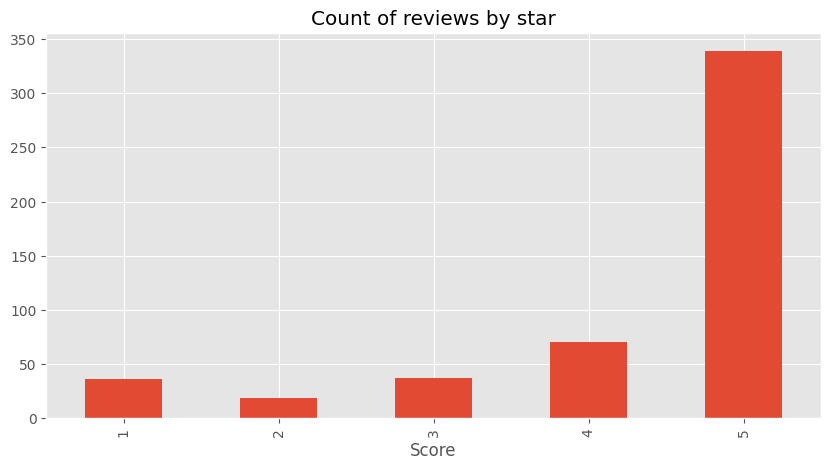

In [ ]:
#EDA(Exploratory Data Analysis)
df['Score'].value_counts().sort_index().plot(kind= 'bar' , title ="Count of reviews by star", figsize=(10,5))


In [ ]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokens = nltk.word_tokenize(example)
print(tokens[0:10])

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
89-/*-/

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
tagged= nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [ ]:
 import nltk
 nltk.download('maxent_ne_chunker')
 nltk.download('words')
 nltk.download('vader_lexicon')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
!pip install nltk

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores("I am so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores("This is worst thing ever.")

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
print(len(df))

500


In [ ]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [ ]:
from tqdm import tqdm

res ={}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row["Id"]
    res[myid] = sia.polarity_scores(text)


100%|██████████| 500/500 [00:00<00:00, 1049.65it/s]


In [ ]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns= {'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


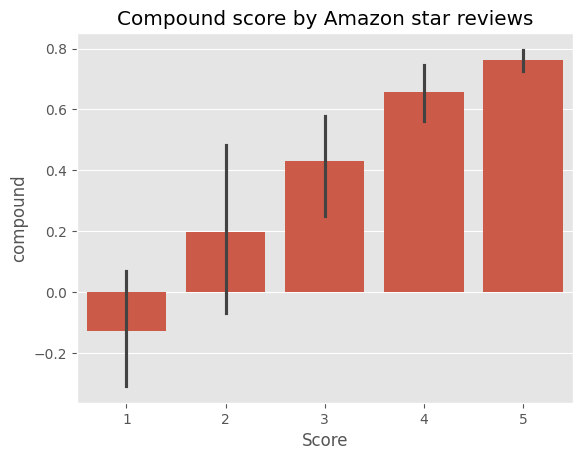

In [ ]:
ax= sns.barplot(data = vaders, x='Score', y='compound')
ax.set_title("Compound score by Amazon star reviews")
plt.show()

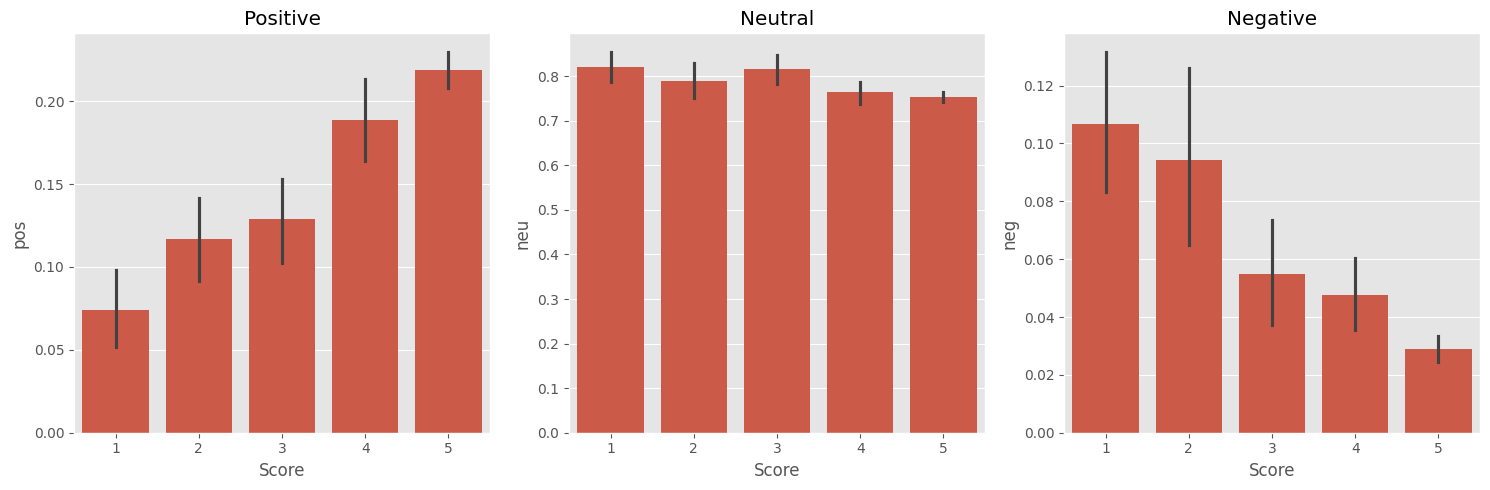

In [ ]:
fis,axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data = vaders, x='Score', y='pos', ax= axs[0])
sns.barplot(data = vaders, x='Score', y='neu', ax= axs[1])

sns.barplot(data = vaders, x='Score', y='neg', ax= axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()

plt.show()

Roberta PreTrained Model
## **New Section**

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import log_softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
print(model)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
# vader result


print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
# roberta model
from tensorflow.nn import softmax

encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)

scores = output[0][0].detach().numpy()
scores = softmax(scores)

scores_dict ={
    'roberta_neg' : scores[0].numpy(),
    'roberta_neu' : scores[1].numpy(),
    'roberta_pos' : scores[2].numpy()
}
print(scores_dict)
print(encoded_text)

{'roberta_neg': 0.9535124, 'roberta_neu': 0.040926386, 'roberta_pos': 0.005561247}
{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)

  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict ={
    'roberta_neg' : scores[0].numpy(),
    'roberta_neu' : scores[1].numpy(),
    'roberta_pos' : scores[2].numpy()
   }
  return scores_dict

too long texts cant be processed by roberta... if too long error occurs..hence try catch

In [ ]:
from tqdm import tqdm

res ={}
vader_result_rename={}
for i, row in tqdm(df.iterrows(), total = len(df)):
  try:
    text = row['Text']
    myid = row["Id"]
    vader_result = sia.polarity_scores(text)
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
    res[myid] =both
  except RuntimeError:
    print(f"Break for id {myid}")


 16%|█▋        | 82/500 [00:58<01:50,  3.77it/s]

Break fro id 83


 37%|███▋      | 186/500 [01:43<01:53,  2.77it/s]

Break fro id 187


100%|██████████| 500/500 [04:05<00:00,  2.03it/s]


In [ ]:
# res

In [ ]:
# Merging two dictionaries


# a={"name":"sir", "age":36}
# b={"loc":"htn", "class": 5}
# c={**a, **b}
# print(c)

In [ ]:
# import pandas as pd

# # Sample dictionary
# data = {
#     'A': [1, 2, 3, 4],
#     'B': ['a', 'b', 'c', 'd'],
#     'C': [True, False, True, False]
# }

# # Convert dictionary to DataFrame
# df = pd.DataFrame(data)

# # Print DataFrame
# print(df)


In [ ]:
bb= pd.DataFrame(res)
bb

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
vader_neg,0.000000,0.138000,0.091000,0.000000,0.000000,0.029000,0.034000,0.000000,0.000000,0.000000,...,0.055000,0.000000,0.056000,0.100000,0.000000,0.000000,0.059000,0.025000,0.041000,0.000000
vader_neu,0.695000,0.862000,0.754000,1.000000,0.552000,0.809000,0.693000,0.520000,0.851000,0.705000,...,0.704000,0.717000,0.855000,0.645000,0.788000,0.554000,0.799000,0.762000,0.904000,0.678000
vader_pos,0.305000,0.000000,0.155000,0.000000,0.448000,0.163000,0.273000,0.480000,0.149000,0.295000,...,0.241000,0.283000,0.089000,0.254000,0.212000,0.446000,0.142000,0.212000,0.055000,0.322000
vader_compound,0.944100,-0.566400,0.826500,0.000000,0.946800,0.883000,0.934600,0.948700,0.636900,0.831300,...,0.928700,0.936700,0.597600,0.648600,0.974300,0.972500,0.783300,0.984800,0.128000,0.981100
roberta_neg,0.010578,0.716768,0.005176,0.002919,0.004527,0.004592,0.004291,0.004345,0.003473,0.003895,...,0.619584,0.004192,0.164964,0.309805,0.007341,0.003676,0.006778,0.008474,0.796346,0.009731
roberta_neu,0.038816,0.271225,0.077858,0.047125,0.009283,0.027828,0.014206,0.007072,0.057009,0.033809,...,0.255072,0.023165,0.243467,0.399656,0.022292,0.012186,0.024208,0.081599,0.178151,0.026412
roberta_pos,0.950607,0.012007,0.916966,0.949957,0.986190,0.967580,0.981503,0.988583,0.939518,0.962296,...,0.125344,0.972643,0.591568,0.290540,0.970367,0.984138,0.969013,0.909927,0.025503,0.963857


In [ ]:
if df.index is not None:
    print("DataFrame has an index.")
else:
    print("DataFrame does not have an index.")

DataFrame has an index.


In [ ]:
results_df = pd.DataFrame(res).T
print(results_df)


aps= results_df.reset_index()
print(f"as is",aps)


results_df = results_df.reset_index().rename(columns= {'index': 'Id'})
print(results_df)

results_df = results_df.merge(df, how='left')
print(results_df)


     vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
1        0.000      0.695      0.305          0.9441     0.010578   
2        0.138      0.862      0.000         -0.5664     0.716768   
3        0.091      0.754      0.155          0.8265     0.005176   
4        0.000      1.000      0.000          0.0000     0.002919   
5        0.000      0.552      0.448          0.9468     0.004527   
..         ...        ...        ...             ...          ...   
496      0.000      0.554      0.446          0.9725     0.003676   
497      0.059      0.799      0.142          0.7833     0.006778   
498      0.025      0.762      0.212          0.9848     0.008474   
499      0.041      0.904      0.055          0.1280     0.796346   
500      0.000      0.678      0.322          0.9811     0.009731   

     roberta_neu  roberta_pos  
1       0.038816     0.950607  
2       0.271225     0.012007  
3       0.077858     0.916966  
4       0.047125     0.949957  
5       0.0

In [ ]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.010578,0.038816,0.950607,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.716768,0.271225,0.012007,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.005176,0.077858,0.916966,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002919,0.047125,0.949957,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.004527,0.009283,0.986190,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Compare Scores between models

In [ ]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Combine and compare

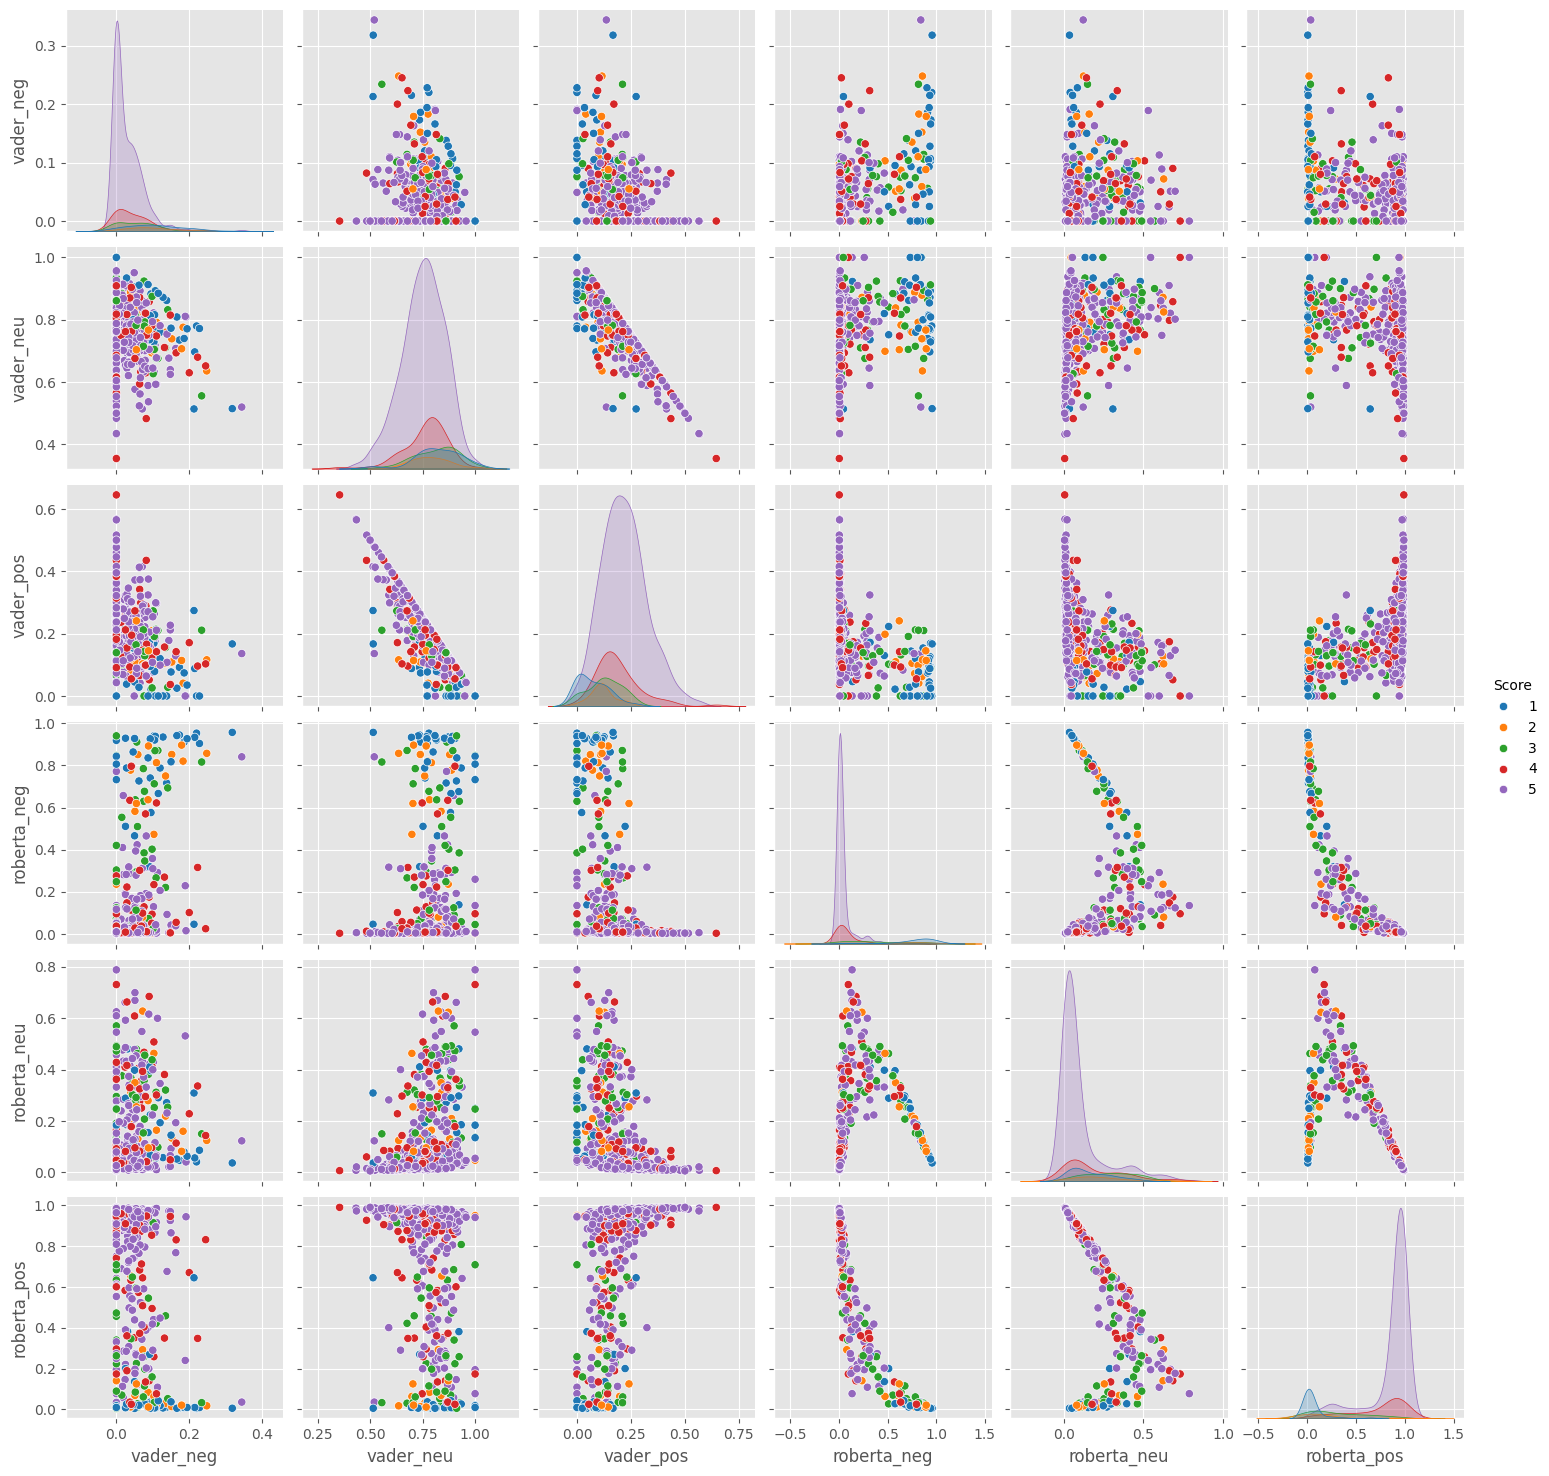

In [ ]:
sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'], hue='Score', palette='tab10')
plt.show()

Model score and review score differ at following examples:

Review examples

In [ ]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending= False).values[0]

array([325, 0.213, 0.514, 0.274, 0.3185, 0.04587627202272415,
       0.3088034689426422, 0.6453202962875366, 'B000JEHAHS',
       'A2CU16YU1KEOUY', 'Hurricane Ridge "Chris"', 5, 19, 1, 1168300800,
       'Never Arrived',
       'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'],
      dtype=object)

In [ ]:
results_df.query('Score == 1').sort_values('vader_pos', ascending= False).values[0]

array([325, 0.213, 0.514, 0.274, 0.3185, 0.04587627202272415,
       0.3088034689426422, 0.6453202962875366, 'B000JEHAHS',
       'A2CU16YU1KEOUY', 'Hurricane Ridge "Chris"', 5, 19, 1, 1168300800,
       'Never Arrived',
       'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'],
      dtype=object)

-ve sentiment 5 star review

In [ ]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending= False).values[0]

array([70, 0.344, 0.52, 0.136, -0.7345, 0.8411046862602234,
       0.12269433587789536, 0.03620094805955887, 'B000E7VI7S',
       'AWCBF2ZWIN57F', 'C. Salcido', 0, 2, 5, 1185753600,
       'pretzel haven!',
       'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'],
      dtype=object)

In [ ]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending= False).values[0]

array([70, 0.344, 0.52, 0.136, -0.7345, 0.8411046862602234,
       0.12269433587789536, 0.03620094805955887, 'B000E7VI7S',
       'AWCBF2ZWIN57F', 'C. Salcido', 0, 2, 5, 1185753600,
       'pretzel haven!',
       'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'],
      dtype=object)

EXtra transformers pipeline

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
sent_pipeline('I love sentiment analysis')

[{'label': 'POSITIVE', 'score': 0.999736487865448}]

In [ ]:
sent_pipeline('make sure to like and suscribe here')

[{'label': 'POSITIVE', 'score': 0.9942764639854431}]

In [ ]:
sent_pipeline('boo')

[{'label': 'NEGATIVE', 'score': 0.9715902209281921}]